In [1]:
import numpy
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets
from torch.utils.data import DataLoader

In [2]:
dataset = datasets.MNIST('.', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
dataset[3]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F78CD0095B0>, 1)

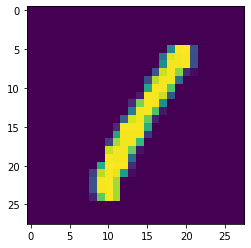

In [4]:
import matplotlib.pyplot as plt

plt.imshow(dataset.data[3].detach().numpy())
plt.show()

In [5]:
#Попробуем проверить как инициализация весов влияет на результат

class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_p=0.1):
        
        super().__init__()        

        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        nn.init.xavier_normal_(self.linear1.weight)
        self.do1 = nn.Dropout(dropout_p)
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        nn.init.xavier_normal_(self.linear2.weight)
        self.do2 = nn.Dropout(dropout_p)
        self.linear3 = nn.Linear(hidden_dim2, output_dim)

        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.do1(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.do2(x)
        x = self.linear3(x)

        return x

In [6]:
def collate_fn(data: list):
    pics = []
    target = []
    for item in data:
        pics.append(numpy.array(item[0]))
        target.append(item[1])
    pics = torch.from_numpy(numpy.array(pics)).float() / 255
    target = torch.from_numpy(numpy.array(target))

    return {
        'data': pics.view(pics.size(0), -1), 
        'target': target,
    }

In [7]:
# hyperparams
inp_dim = 28 * 28
hidden1 = 256
hidden2 = 128
out_dim = 10
device_id = -1
device = 'cpu' if device_id == -1 else 'mps' # 'cuda:1' id GPU
n_epochs = 10
batch_size = 128

In [8]:
model = LinearModel(inp_dim, hidden1, hidden2, out_dim).to(device)
model.train() 
optim = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

In [9]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                            batch_size, 
                            shuffle=True, 
                            collate_fn=collate_fn,
                            drop_last = True,
                            )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    #save every epoch
    torch.save(model.state_dict(), f'./chkpt_cv1_{epoch}.pth')

epoch: 0, step: 0, loss: 2.3436450958251953
epoch: 0, step: 200, loss: 0.4710894227027893
epoch: 0, step: 400, loss: 0.3661273419857025
epoch: 1, step: 0, loss: 0.2531581521034241
epoch: 1, step: 200, loss: 0.1955329030752182
epoch: 1, step: 400, loss: 0.1692223995923996
epoch: 2, step: 0, loss: 0.19018015265464783
epoch: 2, step: 200, loss: 0.18985116481781006
epoch: 2, step: 400, loss: 0.1299697309732437
epoch: 3, step: 0, loss: 0.1172601580619812
epoch: 3, step: 200, loss: 0.08305978029966354
epoch: 3, step: 400, loss: 0.16998785734176636
epoch: 4, step: 0, loss: 0.07599933445453644
epoch: 4, step: 200, loss: 0.1042262613773346
epoch: 4, step: 400, loss: 0.08966232091188431
epoch: 5, step: 0, loss: 0.12169651687145233
epoch: 5, step: 200, loss: 0.059022124856710434
epoch: 5, step: 400, loss: 0.028674175962805748
epoch: 6, step: 0, loss: 0.07590712606906891
epoch: 6, step: 200, loss: 0.0912594422698021
epoch: 6, step: 400, loss: 0.09946417063474655
epoch: 7, step: 0, loss: 0.11940073

In [12]:
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_p=0.1):
        
        super().__init__()        

        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        nn.init.kaiming_normal_(self.linear1.weight)
        self.do1 = nn.Dropout(dropout_p)
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        nn.init.kaiming_normal_(self.linear2.weight)
        self.do2 = nn.Dropout(dropout_p)
        self.linear3 = nn.Linear(hidden_dim2, output_dim)

        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.do1(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.do2(x)
        x = self.linear3(x)

        return x

In [13]:
def collate_fn(data: list):
    pics = []
    target = []
    for item in data:
        pics.append(numpy.array(item[0]))
        target.append(item[1])
    pics = torch.from_numpy(numpy.array(pics)).float() / 255
    target = torch.from_numpy(numpy.array(target))

    return {
        'data': pics.view(pics.size(0), -1), 
        'target': target,
    }

In [14]:
inp_dim = 28 * 28
hidden1 = 256
hidden2 = 128
out_dim = 10
device_id = -1
device = 'cpu' if device_id == -1 else 'mps' # 'cuda:1' id GPU
n_epochs = 10
batch_size = 128

In [15]:
model = LinearModel(inp_dim, hidden1, hidden2, out_dim).to(device)
model.train() 
optim = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()

In [16]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                            batch_size, 
                            shuffle=True, 
                            collate_fn=collate_fn,
                            drop_last = True,
                            )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    #save every epoch
    torch.save(model.state_dict(), f'./chkpt_cv1_{epoch}.pth')

epoch: 0, step: 0, loss: 2.3303771018981934
epoch: 0, step: 200, loss: 0.26541221141815186
epoch: 0, step: 400, loss: 0.0981278344988823
epoch: 1, step: 0, loss: 0.14893732964992523
epoch: 1, step: 200, loss: 0.09058111906051636
epoch: 1, step: 400, loss: 0.22693492472171783
epoch: 2, step: 0, loss: 0.14515860378742218
epoch: 2, step: 200, loss: 0.12533257901668549
epoch: 2, step: 400, loss: 0.16396212577819824
epoch: 3, step: 0, loss: 0.07628566771745682
epoch: 3, step: 200, loss: 0.043295059353113174
epoch: 3, step: 400, loss: 0.10594609379768372
epoch: 4, step: 0, loss: 0.03971737250685692
epoch: 4, step: 200, loss: 0.04657706990838051
epoch: 4, step: 400, loss: 0.039784085005521774
epoch: 5, step: 0, loss: 0.05933729186654091
epoch: 5, step: 200, loss: 0.03858305886387825
epoch: 5, step: 400, loss: 0.017133982852101326
epoch: 6, step: 0, loss: 0.03676781803369522
epoch: 6, step: 200, loss: 0.06276845186948776
epoch: 6, step: 400, loss: 0.05521468073129654
epoch: 7, step: 0, loss: 0

In [3]:
class ConvModel(nn.Module):
  def __init__(self, input_ch, hidden_ch, output_dim, dropout_p=0.1):
    super().__init__()
    # уменьшит размер картинки в 2 раза
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, padding=2, stride=2)
    nn.init.xavier_normal_(self.conv1.weight)
    self.bn1 = nn.BatchNorm2d(hidden_ch)
    self.pool = nn.MaxPool2d(kernel_size=3,padding=1,stride=1)
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, padding=1, stride=1)
    nn.init.xavier_normal_(self.conv2.weight)
    nn.init.kaiming_normal_(self.conv2.weight)
    self.bn2 = nn.BatchNorm2d(hidden_ch)
    self.conv3 = nn.Conv2d(hidden_ch, 5, kernel_size=3, padding=1, stride=1)
    nn.init.xavier_normal_(self.conv3.weight)
    self.classifier = nn.Linear(5 * 14 *14, output_dim)
    self.do1 = nn.Dropout(dropout_p)
    self.do2 = nn.Dropout(dropout_p)

    self.activation = nn.Sigmoid()

  def forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.activation(x)
    x = self.do1(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.bn2(x)
    x = self.activation(x)
    x = self.do2(x)
    x = self.conv3(x)
    x = self.classifier(x.view(x.size(0), -1))

    return x

In [4]:
# hyperparams
input_ch = 1
hidden_ch = 128
out_dim = 10
device_id = 0
device = 'cpu' if device_id == -1 else f'cuda:{device_id}'
n_epochs = 10
batch_size = 128

In [5]:
def collate_fn_conv(data: list):
  # data = [(pic, target)...]
  pics = []
  target = []
  for item in data:
    pics.append(numpy.array(item[0]))
    target.append(item[1])
  pics = torch.from_numpy(numpy.array(pics)).float() / 255 # B x W x H
  target = torch.from_numpy(numpy.array(target))

  return {
      'data': pics.unsqueeze(1), # B x 1 x W x H
      'target': target.long(),
      }

In [6]:
model_conv = ConvModel(input_ch, hidden_ch, out_dim).to(device)
optim = torch.optim.Adam(model_conv.parameters())
loss_func = nn.CrossEntropyLoss()

In [7]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                          batch_size, 
                          shuffle=True, 
                          collate_fn=collate_fn_conv,
                          drop_last = True,
                          )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model_conv(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    #save every epoch
    torch.save(model_conv.state_dict(), f'./chkpt_cv1_conv_{epoch}.pth')

epoch: 0, step: 0, loss: 2.3426761627197266
epoch: 0, step: 200, loss: 0.10622569918632507
epoch: 0, step: 400, loss: 0.03801621124148369
epoch: 1, step: 0, loss: 0.04566780850291252
epoch: 1, step: 200, loss: 0.12006907165050507
epoch: 1, step: 400, loss: 0.05368940532207489
epoch: 2, step: 0, loss: 0.041816238313913345
epoch: 2, step: 200, loss: 0.01114704366773367
epoch: 2, step: 400, loss: 0.019321106374263763
epoch: 3, step: 0, loss: 0.04683506861329079
epoch: 3, step: 200, loss: 0.02425997518002987
epoch: 3, step: 400, loss: 0.13436539471149445
epoch: 4, step: 0, loss: 0.02089267037808895
epoch: 4, step: 200, loss: 0.037079982459545135
epoch: 4, step: 400, loss: 0.04794299602508545
epoch: 5, step: 0, loss: 0.03716443479061127
epoch: 5, step: 200, loss: 0.029030630365014076
epoch: 5, step: 400, loss: 0.04807890206575394
epoch: 6, step: 0, loss: 0.015587721019983292
epoch: 6, step: 200, loss: 0.06817211210727692
epoch: 6, step: 400, loss: 0.022316699847579002
epoch: 7, step: 0, los

In [8]:
class ConvModel(nn.Module):
  def __init__(self, input_ch, hidden_ch, output_dim, dropout_p=0.1):
    super().__init__()
    # уменьшит размер картинки в 2 раза
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, padding=2, stride=2)
    nn.init.kaiming_normal_(self.conv1.weight)
    self.bn1 = nn.BatchNorm2d(hidden_ch)
    
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, padding=1, stride=1)
    nn.init.kaiming_normal_(self.conv2.weight)
    
    self.bn2 = nn.BatchNorm2d(hidden_ch)
    self.conv3 = nn.Conv2d(hidden_ch, 5, kernel_size=3, padding=1, stride=1)
    nn.init.kaiming_normal_(self.conv3.weight)
    self.classifier = nn.Linear(5 * 14 *14, output_dim)
    self.do1 = nn.Dropout(dropout_p)
    self.do2 = nn.Dropout(dropout_p)

    self.activation = nn.ReLU()

  def forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.activation(x)
    x = self.do1(x)
   
    x = self.conv2(x)
    x = self.bn2(x)
    x = self.activation(x)
    x = self.do2(x)
    x = self.conv3(x)
    x = self.classifier(x.view(x.size(0), -1))

    return x

In [9]:
model_conv = ConvModel(input_ch, hidden_ch, out_dim).to(device)
optim = torch.optim.Adam(model_conv.parameters())
loss_func = nn.CrossEntropyLoss()

In [10]:
for epoch in range(n_epochs):
    dataloader = DataLoader(dataset, 
                          batch_size, 
                          shuffle=True, 
                          collate_fn=collate_fn_conv,
                          drop_last = True,
                          )
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model_conv(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    #save every epoch
    torch.save(model_conv.state_dict(), f'./chkpt_cv1_conv_{epoch}.pth')

epoch: 0, step: 0, loss: 2.4074602127075195
epoch: 0, step: 200, loss: 0.06738412380218506
epoch: 0, step: 400, loss: 0.08533280342817307
epoch: 1, step: 0, loss: 0.054815374314785004
epoch: 1, step: 200, loss: 0.0413183830678463
epoch: 1, step: 400, loss: 0.05850709602236748
epoch: 2, step: 0, loss: 0.08637173473834991
epoch: 2, step: 200, loss: 0.01913127303123474
epoch: 2, step: 400, loss: 0.05568951368331909
epoch: 3, step: 0, loss: 0.008073397912085056
epoch: 3, step: 200, loss: 0.017599310725927353
epoch: 3, step: 400, loss: 0.01840038225054741
epoch: 4, step: 0, loss: 0.07642791420221329
epoch: 4, step: 200, loss: 0.011122613213956356
epoch: 4, step: 400, loss: 0.06396744400262833
epoch: 5, step: 0, loss: 0.03853827714920044
epoch: 5, step: 200, loss: 0.01626107282936573
epoch: 5, step: 400, loss: 0.012743202969431877
epoch: 6, step: 0, loss: 0.0031970608979463577
epoch: 6, step: 200, loss: 0.023377856239676476
epoch: 6, step: 400, loss: 0.007203073240816593
epoch: 7, step: 0, l